
# Example 2: Prostate Cancer  (Linear Regression with variables selection)       

# Read the data 




In [1]:
# prostate <- read.table("http://www2.isye.gatech.edu/~ymei/7406/Handouts/prostate.csv", header= TRUE, sep = ",")
# #prostate <- read.table("C:/myajun/Teaching/7406/data/prostate.csv", header= TRUE, sep = ",")

import urllib.request # the lib that handles the url stuff
targetURL = "http://www2.isye.gatech.edu/~ymei/7406/Handouts/prostate.csv"
data = urllib.request.urlopen(targetURL) # it's a file like object and works just like a file

DATA=[]
for idx, line in enumerate(urllib.request.urlopen(targetURL)):
    #for the headline
    if idx == 0:
        new_line = line.decode("utf-8") #decode the bytes object to produce a string
        new_line = new_line.rstrip('\r\n') #remove \r\n
        header_names = new_line.split(' ')
    #for the rest lines    
    else:
        new_line = line.decode("utf-8")
        new_line = new_line.lstrip(' ')
        new_line = new_line.rstrip('\r\n')
        data = new_line.split()
        
    DATA.append(data) #all data without header


b'lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train\r\n'
lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train

lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
['lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train']


In [3]:
import pandas as pd
df = pd.DataFrame(DATA[1:],columns=header_names) #construct the dataframe, DataFrame is widely used for 2D data analysis
df.head()

,"lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train"
0,"-0.579818495,2.769459,50,-1.38629436,0,-1.3862..."
1,"-0.994252273,3.319626,58,-1.38629436,0,-1.3862..."
2,"-0.510825624,2.691243,74,-1.38629436,0,-1.3862..."
3,"-1.203972804,3.282789,58,-1.38629436,0,-1.3862..."
4,"0.751416089,3.432373,62,-1.38629436,0,-1.38629..."


## read the data from local address

In [2]:
import pandas as pd
import re   #Regular expression operations
#re.split is very powerful for split strings and values....  re.split(r'(?:,|;|\s)\s*', line),re.split(r'(;|,|\s)\s*', line)  
data_local = pd.read_csv('C:/Users/tianh/Dropbox (GaTech)/7406 Python code/prostate.csv', sep = (r'(?:,|;|\s)\s*'), header =0) #pay attention to the split criteria
data_local.head()

C:\Users\tianh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


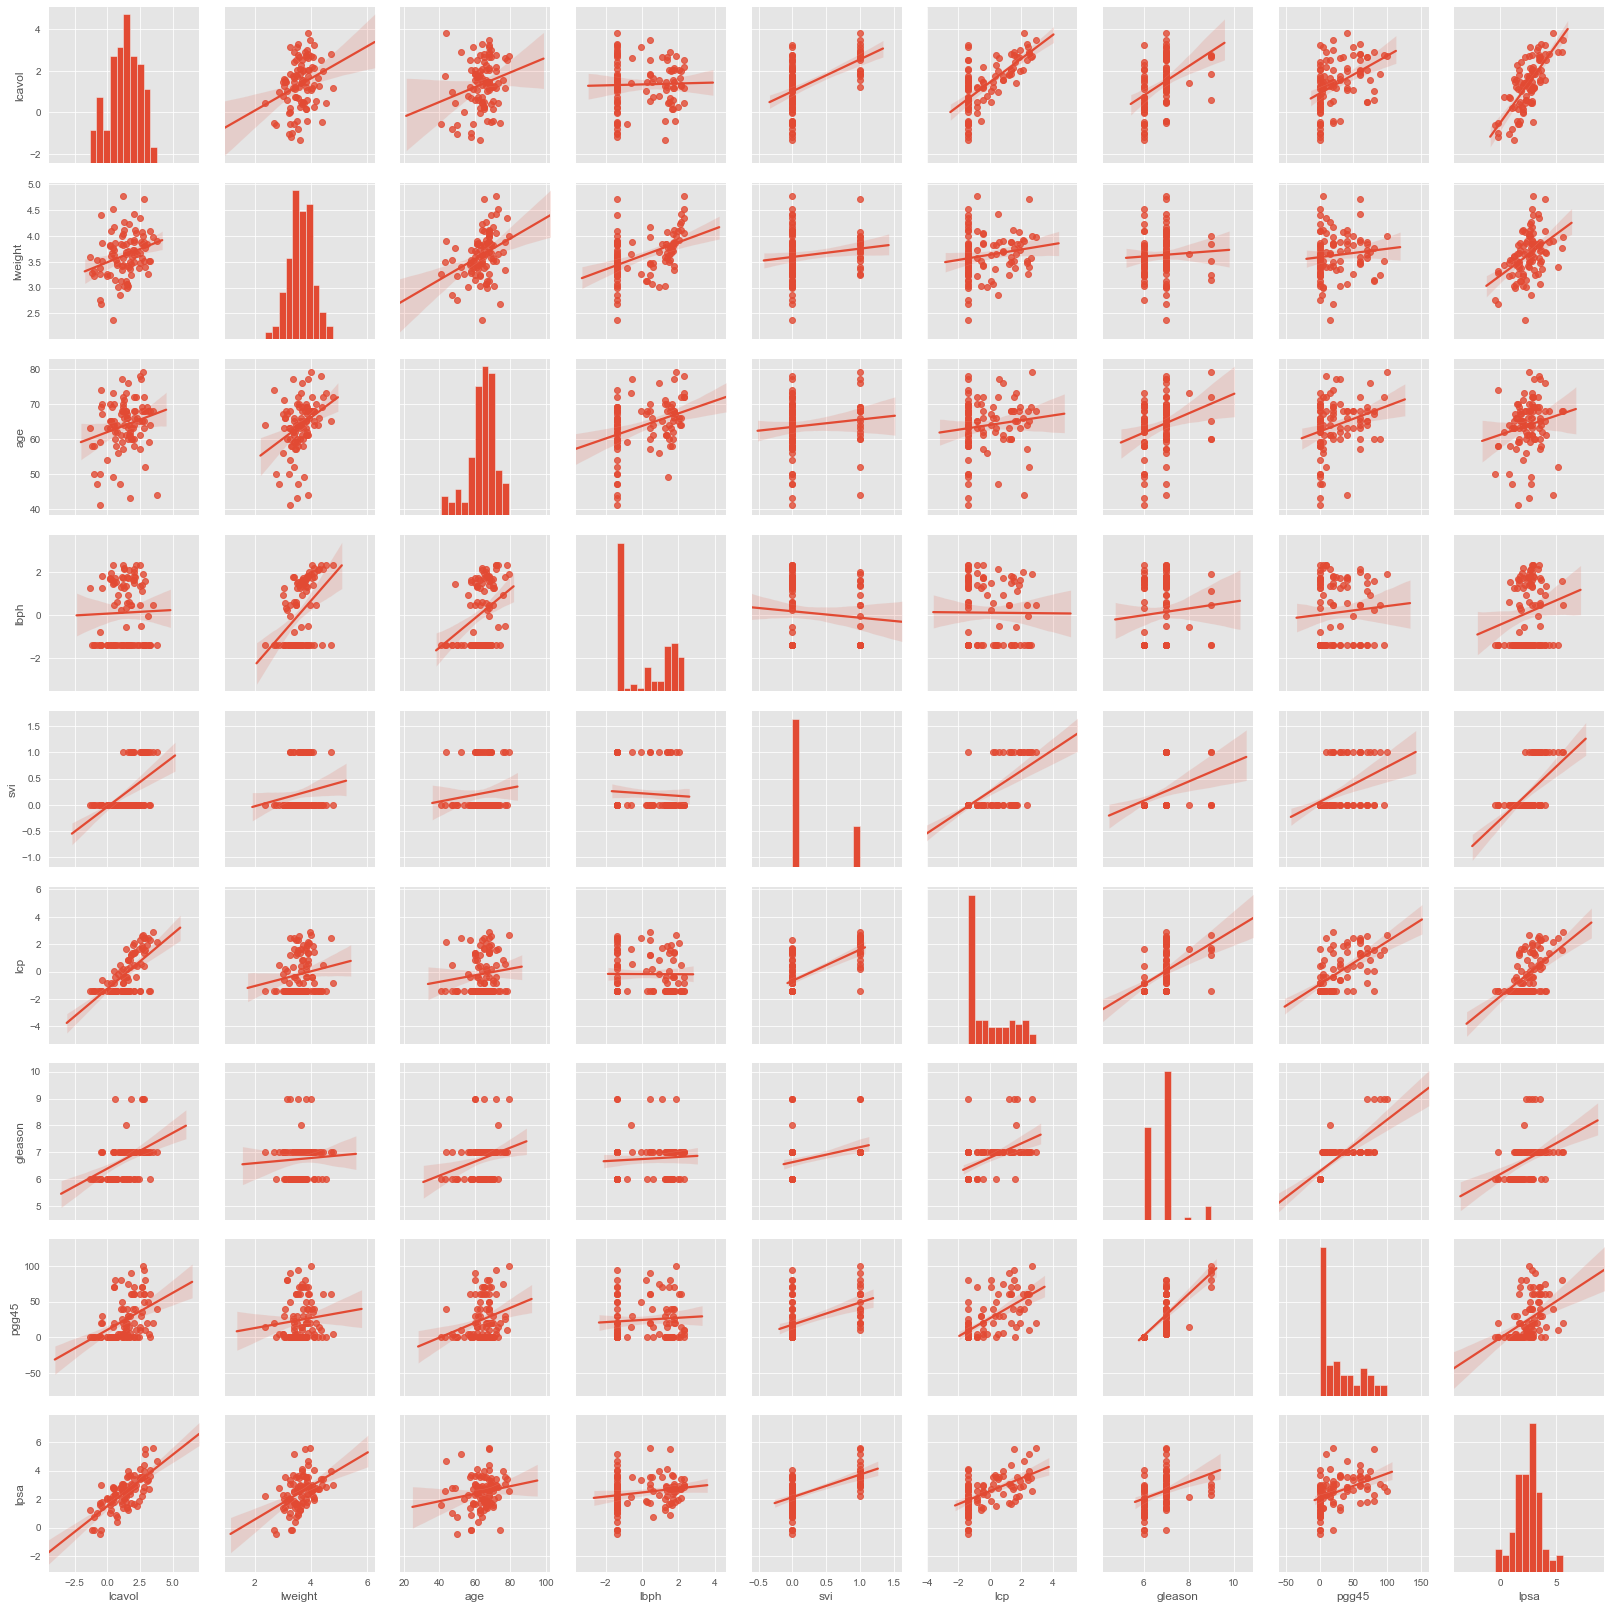

In [171]:
# plot for possible collinrarity?
# library(lattice)
# splom(prostate[,1:9], pscales = 0)
# library 
import seaborn as sns
import matplotlib.pyplot as plt
 
# Basic correlogram
sns.pairplot(data_local, kind="reg") #  or kind = 'scatter'
plt.show()

Text(0.5, 1.0, 'whitegrid')

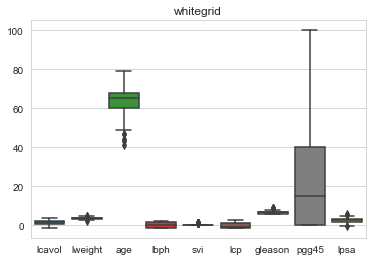

In [4]:
## outliers?
# par(mfrow = c(3,3))

# # Grouped boxplot by seaborn
sns.set_style("whitegrid")  #or ("darkgrid", "dark", "ticks"
sns.boxplot(data=data_local)
plt.title("whitegrid")


## split the training + test data 
#prostate[,1:8] <- scale(prostate[,1:8], TRUE, TRUE); 

training <- subset( prostate, train == TRUE)[,1:9];
test     <- subset( prostate, train == FALSE)[,1:9];

In [5]:
## general train test split ptocess:
#  from sklearn.model_selection import train_test_split    
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# prostate_train, prostate_test = train_test_split(data_local, test_size=0.33, random_state=42)

In [6]:
data_local.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


In [7]:
prostate_train = data_local[data_local['train'] == 'T']
prostate_train.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


In [8]:
prostate_test = data_local[data_local['train'] == 'F']

In [9]:
np.shape(prostate_train)

NameError: name 'np' is not defined

In [ ]:
np.shape(prostate_test)

In [ ]:
prostate_train. describe()   #corresponds to : summary(training) in R

In [ ]:
# The corrlation table (the last column is Y)
data_local.corr()

In [ ]:
round(data_local.corr(), 2)

# Fit a linear regression on the training data

In [14]:
from statsmodels.formula.api import ols

model0 = ols( 'lpsa ~ lcavol+lweight+age+lbph+svi+lcp+gleason+pgg45', data = prostate_train).fit()
# #gather features
# features = "+".join(prostate_train.columns - ["lpsa"])
# model0 = ols( 'lpsa ~ ' + features, data = prostate_train).fit()
print(model0.summary()); 

                            OLS Regression Results                            
Dep. Variable:                   lpsa   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     16.47
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.04e-12
Time:                        01:42:55   Log-Likelihood:                -67.505
No. Observations:                  67   AIC:                             153.0
Df Residuals:                      58   BIC:                             172.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4292      1.554      0.276      0.7

### The p-value for the F-statistic is very small, R^2 value OK, but several of individual predictors are not significant. There are several large pairwise correlation both between predictors and between predictors and the response (lpsa). 


## Check the eigen-decomposition to find condition numbers 
## Two ways. The first approach:

In [15]:
from patsy import dmatrices, dmatrix, demo_data

outcome, predictors  = dmatrices( 'lpsa ~ lcavol+lweight+age+lbph+svi+lcp+gleason+pgg45', data = prostate_train)
#The return value is a Python tuple containing two DesignMatrix objects, the first representing the left-hand side of our formula, 
#and the second representing the right-hand side.
X = predictors
X

DesignMatrix with shape (67, 9)
  Intercept    lcavol  lweight  age      lbph  svi       lcp  gleason  pgg45
          1  -0.57982  2.76946   50  -1.38629    0  -1.38629        6      0
          1  -0.99425  3.31963   58  -1.38629    0  -1.38629        6      0
          1  -0.51083  2.69124   74  -1.38629    0  -1.38629        7     20
          1  -1.20397  3.28279   58  -1.38629    0  -1.38629        6      0
          1   0.75142  3.43237   62  -1.38629    0  -1.38629        6      0
          1  -1.04982  3.22883   50  -1.38629    0  -1.38629        6      0
          1   0.69315  3.53951   58   1.53687    0  -1.38629        6      0
          1   0.25464  3.60414   65  -1.38629    0  -1.38629        6      0
          1  -1.34707  3.59868   63   1.26695    0  -1.38629        6      0
          1   1.61343  3.02286   63  -1.38629    0  -0.59784        7     30
          1   1.47705  2.99823   67  -1.38629    0  -1.38629        7      5
          1   1.54116  3.06105   66  -1.3862

In [149]:
type(X)

patsy.design_info.DesignMatrix

In [18]:
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8
0,1.0,-0.579818,2.769459,50.0,-1.386294,0.0,-1.386294,6.0,0.0
1,1.0,-0.994252,3.319626,58.0,-1.386294,0.0,-1.386294,6.0,0.0
2,1.0,-0.510826,2.691243,74.0,-1.386294,0.0,-1.386294,7.0,20.0
3,1.0,-1.203973,3.282789,58.0,-1.386294,0.0,-1.386294,6.0,0.0
4,1.0,0.751416,3.432373,62.0,-1.386294,0.0,-1.386294,6.0,0.0


In [151]:
# eign1 <- eigen( t(X) held X); 
# round(eign1$val,2)
from numpy import linalg as LA
w, v = LA.eig(np.dot(X.T,  X))
w

array([3.46664523e+05, 4.50046908e+04, 1.44150295e+02, 1.22061080e+02,
       4.01239121e+01, 2.87652467e+01, 2.06983058e-01, 1.27857850e+01,
       5.44589648e+00])

In [152]:
# round(w,2) TypeError: type numpy.ndarray doesn't define __round__ method
rounded = [np.round(x) for x in w]
rounded

[346665.0, 45005.0, 144.0, 122.0, 40.0, 29.0, 0.0, 13.0, 5.0]

In [153]:
np.sqrt(w[0]/w)

array([1.00000000e+00, 2.77540144e+00, 4.90396014e+01, 5.32925002e+01,
       9.29507855e+01, 1.09779348e+02, 1.29415800e+03, 1.64661096e+02,
       2.52301603e+02])

### Or equivalent approach
##  the second way is to Use Singular Value Decompisition to find condition numbers 
xsvd = svd(X); 
xsvd$d;
xsvd$d[1]/xsvd$d

In [154]:
u, s, vh = np.linalg.svd(X, full_matrices=True)

In [155]:
s[0]/s

array([1.00000000e+00, 2.77540144e+00, 4.90396014e+01, 5.32925002e+01,
       9.29507855e+01, 1.09779348e+02, 1.64661096e+02, 2.52301603e+02,
       1.29415800e+03])

## Now check variance inflation factors (VIF)
VIF1 <- NULL;
X <- model.matrix(model0);
for (i in 2:9) VIF1 <- cbind(VIF1, 1/(1-summary(lm(X[,i] ~ X[,-i]))$r.squared)); 
colnames(VIF1) <- colnames(training)[1:8]
VIF1



% # Step 1: Run a multiple regression
% # %%capture
% # #gather features
% # features = "+".join(df.columns - ["annual_inc"])

% # # get y and X dataframes based on this regression:
% # y, X = dmatrices('annual_inc ~' + features, df, return_type='dataframe')
% # outcome, predictors

% # Step 2: Calculate VIF Factors
% # # For each X, calculate VIF and save in dataframe
% # vif = pd.DataFrame()
% # vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
% # vif["features"] = X.columns


% # Step 3: Inspect VIF Factors
% # vif.round(1)

reference: https://etav.github.io/python/vif_factor_python.html

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] =X.columns #list(prostate_train.columns[0:8]).insert(0,"interception")

In [74]:
vif[1:9].round(3) #note that the first one (index 0) is for the intercept

,VIF Factor,features
1,2.318,1
2,1.472,2
3,1.357,3
4,1.383,4
5,2.045,5
6,3.117,6
7,2.644,7
8,3.313,8


###   lcavol  lweight      age     lbph      svi      lcp gleason    pgg45
#[1,] 2.318496 1.472295 1.356604 1.383429 2.045313 3.117451 2.64448 3.313288

In [75]:
import numpy as np
np.sqrt(vif)

,VIF Factor,features
0,17.853314,0.000000
1,1.522661,1.000000
2,1.213382,1.414214
3,1.164733,1.732051
4,1.176193,2.000000
5,1.430144,2.236068
6,1.765630,2.449490
7,1.626186,2.645751
8,1.820244,2.828427


### In this example, VIF is moderate in size (VIF=1 for orthogonal predictors)


### Another way to see whether the estiamtes are stable or not (due to collinearity)
###  We can assume that the response "lpsa" is difficult to observe accurately
###       and we add a random perturbation of SD  0.1 ( compare to 0.7123)
###                    to each of 67 training data


In [113]:
np.random.seed(1234) #you want to set the seed that calls to np.random... will use, use np.random.seed
#Use the class to avoid impacting the global numpy state: r = np.random.RandomState(1234), r.uniform(0,10,5)...
# 0.1*np.random.normal(0, 1, [67])

In [112]:
# #gather features
# features = "+".join(prostate_train.columns - ["lpsa"])
# model0 = ols( 'lpsa ~ ' + features, data = prostate_train).fit()
import statsmodels.api as sm
y = prostate_train['lpsa']+0.1*np.random.normal(0, 1, [67])
XX = prostate_train.drop(columns=['lpsa','train'])
XX = sm.add_constant(XX) #add a constant manually

model0a = sm.OLS(y, XX).fit()#, d
print(model0a.summary()); 

                            OLS Regression Results                            
Dep. Variable:                   lpsa   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     15.30
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           8.29e-12
Time:                        20:03:15   Log-Likelihood:                -68.684
No. Observations:                  67   AIC:                             155.4
Df Residuals:                      58   BIC:                             175.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6638      1.581      0.420      0.6

C:\Users\tianh\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [109]:
print(model0.summary())

                            OLS Regression Results                            
Dep. Variable:                   lpsa   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     16.47
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.04e-12
Time:                        20:00:20   Log-Likelihood:                -67.505
No. Observations:                  67   AIC:                             153.0
Df Residuals:                      58   BIC:                             172.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4292      1.554      0.276      0.7

### However,  much larger changes in the coefficients (say gleason) indicating
### their sensitivity to responses caused by collinearity 


##  One way to cure collinearity is to drop some variables.

###  Look at correlation again; "lcavol" is correlated to "svi" "lcp";  "lcp"  is highly correlated to "lcavol", "svi", "pgg45", "gleason" is highly correlated to "pgg45", etc.

In [120]:
round(prostate_train.iloc[:,0:8].corr(), 2)

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
lcavol,1.00,0.30,0.29,0.06,0.59,0.69,0.43,0.48
lweight,0.30,1.00,0.32,0.44,0.18,0.16,0.02,0.07
age,0.29,0.32,1.00,0.29,0.13,0.17,0.37,0.28
lbph,0.06,0.44,0.29,1.00,-0.14,-0.09,0.03,-0.03
svi,0.59,0.18,0.13,-0.14,1.00,0.67,0.31,0.48
lcp,0.69,0.16,0.17,-0.09,0.67,1.00,0.48,0.66
gleason,0.43,0.02,0.37,0.03,0.31,0.48,1.00,0.76
pgg45,0.48,0.07,0.28,-0.03,0.48,0.66,0.76,1.00


In [121]:
round(prostate_train.corr(), 2)

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
lcavol,1.00,0.30,0.29,0.06,0.59,0.69,0.43,0.48,0.73
lweight,0.30,1.00,0.32,0.44,0.18,0.16,0.02,0.07,0.49
age,0.29,0.32,1.00,0.29,0.13,0.17,0.37,0.28,0.23
lbph,0.06,0.44,0.29,1.00,-0.14,-0.09,0.03,-0.03,0.26
svi,0.59,0.18,0.13,-0.14,1.00,0.67,0.31,0.48,0.56
lcp,0.69,0.16,0.17,-0.09,0.67,1.00,0.48,0.66,0.49
gleason,0.43,0.02,0.37,0.03,0.31,0.48,1.00,0.76,0.34
pgg45,0.48,0.07,0.28,-0.03,0.48,0.66,0.76,1.00,0.45
lpsa,0.73,0.49,0.23,0.26,0.56,0.49,0.34,0.45,1.00


In [127]:
## Let us say drop "gleason"  
# model0b <- lm(lpsa ~ . - gleason, data= training); 
y_b = prostate_train['lpsa']
XX_b = prostate_train.drop(columns=['lpsa','train','gleason'])
XX_b = sm.add_constant(XX_b) #add a constant manually

model0b = sm.OLS(y_b, XX_b).fit()
print(model0b.summary()); 

                            OLS Regression Results                            
Dep. Variable:                   lpsa   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     19.14
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           4.50e-13
Time:                        20:12:55   Log-Likelihood:                -67.517
No. Observations:                  67   AIC:                             151.0
Df Residuals:                      59   BIC:                             168.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2591      1.025      0.253      0.8

### Similar performance and fewer predictors are used!

### If you must keep all your variables in the model
###  Then you should consider alternative methods of estimation such as Ridge.

# (i) Linea regression with all predictors (Full Model)
### Fit a linear regression on the training data

In [128]:
ytrue = prostate_test['lpsa']

In [131]:
model1 = ols( 'lpsa ~ lcavol+lweight+age+lbph+svi+lcp+gleason+pgg45', data = prostate_train).fit()

print(model1.summary()); 

                            OLS Regression Results                            
Dep. Variable:                   lpsa   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     16.47
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           2.04e-12
Time:                        20:17:30   Log-Likelihood:                -67.505
No. Observations:                  67   AIC:                             153.0
Df Residuals:                      58   BIC:                             172.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4292      1.554      0.276      0.7

In [135]:
MSE1mod1 = np.mean(model1.resid**2)
MSE1mod1

0.4391997680583344

In [145]:
# testign error 
pred1a = model1.predict(prostate_test.iloc[:,0:8]);

In [146]:
MSE2mod1 = np.mean((pred1a - ytrue)**2)
MSE2mod1
#[1] 0.521274

0.5212740055075954

# (ii) Linea regression with the best subset model 
### reference: Choosing the optimal model: Subset selection https://xavierbourretsicotte.github.io/subset_selection.html
http://www.science.smith.edu/~jcrouser/SDS293/labs/lab8-py.html


In [147]:
## libraries
import itertools
import time
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

%matplotlib inline
plt.style.use('ggplot')

## Best subset selection
### Helper function for fitting linear regression (Sklearn)

In [149]:

def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared
    

### Implementing Best subset selection (using itertools.combinations)

In [155]:
#Importing tqdm for the progress bar
from tqdm import tnrange, tqdm_notebook

#Initialization variables
Y = prostate_train['lpsa']
XXX = prostate_train.drop(columns = ['lpsa','train'] )
k = 8 #total number of varibales

RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

#Looping over k = 1 to k = 8 features in XXX
for k in tnrange(1,len(XXX.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 11 choose k
    for combo in itertools.combinations(XXX.columns,k):
        tmp_result = fit_linear_reg(XXX[list(combo)],Y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

### Finding the best subsets for each number of features
### Using the smallest RSS value, or the largest R_squared value

In [156]:
df_min = df[df.groupby('numb_features')['RSS'].transform(min) == df['RSS']]
df_max = df[df.groupby('numb_features')['R_squared'].transform(max) == df['R_squared']]
display(df_min.head(3))
display(df_max.head(3))

,numb_features,RSS,R_squared,features
0,1,44.528583,0.537516,"(lcavol,)"
8,2,37.091846,0.614756,"(lcavol, lweight)"
38,3,34.907749,0.637441,"(lcavol, lweight, svi)"


,numb_features,RSS,R_squared,features
0,1,44.528583,0.537516,"(lcavol,)"
8,2,37.091846,0.614756,"(lcavol, lweight)"
38,3,34.907749,0.637441,"(lcavol, lweight, svi)"


### Adding columns to the dataframe with RSS and R squared values of the best subset

In [159]:
df['min_RSS'] = df.groupby('numb_features')['RSS'].transform(min)
df['max_R_squared'] = df.groupby('numb_features')['R_squared'].transform(max)
df.head()

,numb_features,RSS,R_squared,features,max_R_squared,min_RSS
0,1,44.528583,0.537516,"(lcavol,)",0.537516,44.528583
1,1,73.613540,0.235434,"(lweight,)",0.537516,44.528583
2,1,91.292039,0.051821,"(age,)",0.537516,44.528583
3,1,89.624912,0.069136,"(lbph,)",0.537516,44.528583
4,1,66.422403,0.310122,"(svi,)",0.537516,44.528583


### Plotting the best subset selection process

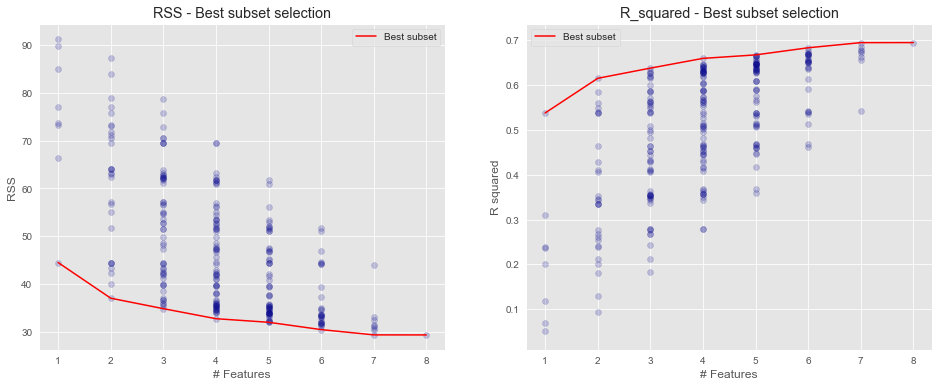

In [160]:
fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax.scatter(df.numb_features,df.RSS, alpha = .2, color = 'darkblue' )
ax.set_xlabel('# Features')
ax.set_ylabel('RSS')
ax.set_title('RSS - Best subset selection')
ax.plot(df.numb_features,df.min_RSS,color = 'r', label = 'Best subset')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.scatter(df.numb_features,df.R_squared, alpha = .2, color = 'darkblue' )
ax.plot(df.numb_features,df.max_R_squared,color = 'r', label = 'Best subset')
ax.set_xlabel('# Features')
ax.set_ylabel('R squared')
ax.set_title('R_squared - Best subset selection')
ax.legend()

plt.show()

## Forward stepwise selection

For computational reasons, the best subset cannot be applied for any large n due to the 2^n complexity. 

Forward Stepwise begins with a model containing no predictors, and then adds predictors to the model, one at the time.

At each step, the variable that gives the greatest additional improvement to the fit is added to the model.

In [161]:
remaining_features = list(XXX.columns.values)
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
features_list = dict()

for i in range(1,k+1):
    best_RSS = np.inf
    
    for combo in itertools.combinations(remaining_features,1):

            RSS = fit_linear_reg(XXX[list(combo) + features],Y)   #Store temp result 

            if RSS[0] < best_RSS:
                best_RSS = RSS[0]
                best_R_squared = RSS[1] 
                best_feature = combo[0]

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()

### Displaying results of the first 4 steps

In [162]:
print('Forward stepwise subset selection')
print('Number of features |', 'Features |', 'RSS')
display([(i,features_list[i], round(RSS_list[i])) for i in range(1,5)])

Forward stepwise subset selection
Number of features | Features | RSS


[(1, ['lcavol'], 45.0),
 (2, ['lcavol', 'lweight'], 37.0),
 (3, ['lcavol', 'lweight', 'svi'], 35.0),
 (4, ['lcavol', 'lweight', 'svi', 'lbph'], 33.0)]

### Combining forward stepwise results into a new DataFrame

In [163]:
df1 = pd.concat([pd.DataFrame({'features':features_list}),pd.DataFrame({'RSS':RSS_list, 'R_squared': R_squared_list})], axis=1, join='inner')
#Concatenate pandas objects along a particular axis with optional set logic along the other axes.
df1['numb_features'] = df1.index

### Computing the C_p, AIC, BIC and R-square adjusted

In [169]:
m = len(Y)
p = 8

hat_sigma_squared = (1/(m - p -1)) * min(df1['RSS'])

#Computing
df1['C_p'] = (1/m) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['AIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['BIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] +  np.log(m) * df1['numb_features'] * hat_sigma_squared )
df1['R_squared_adj'] = 1 - ( (1 - df1['R_squared'])*(m-1)/(m-df1['numb_features'] -1))
df1

,features,RSS,R_squared,numb_features,C_p,AIC,BIC,R_squared_adj
1,[lcavol],44.528583,0.537516,1,0.679751,1.339802,1.372708,0.530401
2,"[lcavol, lweight]",37.091846,0.614756,2,0.583899,1.150877,1.216689,0.602717
3,"[lcavol, lweight, svi]",34.907749,0.637441,3,0.566446,1.116476,1.215193,0.620176
4,"[lcavol, lweight, svi, lbph]",32.814995,0.659176,4,0.550355,1.084761,1.216385,0.637188
5,"[lcavol, lweight, svi, lbph, pgg45]",32.069447,0.666920,5,0.554373,1.092680,1.257209,0.639618
6,"[lcavol, lweight, svi, lbph, pgg45, lcp]",30.539778,0.682807,6,0.546687,1.077530,1.274965,0.651088
7,"[lcavol, lweight, svi, lbph, pgg45, lcp, age]",29.437300,0.694258,7,0.545376,1.074948,1.305289,0.657983
8,"[lcavol, lweight, svi, lbph, pgg45, lcp, age, ...",29.426384,0.694371,8,0.560358,1.104478,1.367724,0.652215


In [170]:
df1['R_squared_adj'].idxmax()
df1['R_squared_adj'].max()

0.6579833075228798

### Plotting the computed values as a function of number of features

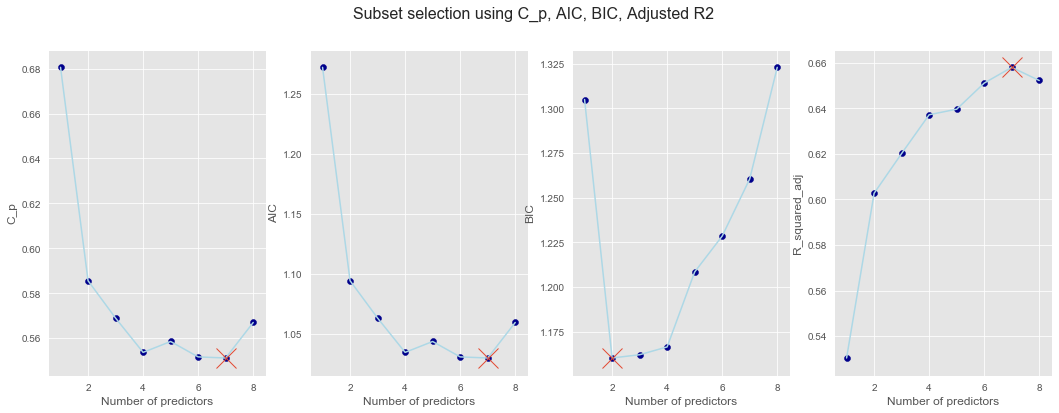

In [166]:
variables = ['C_p', 'AIC','BIC','R_squared_adj']
fig = plt.figure(figsize = (18,6))

for i,v in enumerate(variables):
    ax = fig.add_subplot(1, 4, i+1)
    ax.plot(df1['numb_features'],df1[v], color = 'lightblue')
    ax.scatter(df1['numb_features'],df1[v], color = 'darkblue')
    if v == 'R_squared_adj':
        ax.plot(df1[v].idxmax(),df1[v].max(), marker = 'x', markersize = 20)
    else:
        ax.plot(df1[v].idxmin(),df1[v].min(), marker = 'x', markersize = 20)
    ax.set_xlabel('Number of predictors')
    ax.set_ylabel(v)

fig.suptitle('Subset selection using C_p, AIC, BIC, Adjusted R2', fontsize = 16)
plt.show()

### Comparing models: AIC, BIC, Mallows'CP

The training set Mean Squared Error (MSE) is generally an underestimate of the test MSE. This is because when we fit a model to the training data using least squares, we specifically estimate the regression coefficients such that the training RSS is minimized. 


In particular, the training RSS decreases as we add more features to the model, but the test error may not. 

Therefore the training RSS and R2 may not be used for selecting the best model unless we adjust for this underestimation.
...  see https://xavierbourretsicotte.github.io/subset_selection.html


In [172]:
# ### pairplot for checking colinearity
# sns.pairplot(prostate_train)
# plt.show()

In [174]:
from keras.models import Sequential